# Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

import matplotlib.dates as mdates

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from datetime import datetime

# Importation des données

In [2]:
df = pd.read_csv("2025-08-MD.csv")

In [3]:
df.head()

,sasdate,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,...,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx
0,Transform:,5.000,5.0,5.000,5.0000,5.00000,5.0000,5.0000,5.0000,5.0000,...,6.000,6.000,6.00,6.00,6.00,2.0,6.0,6.0,6.0000,1.0
1,1/1/1959,2583.560,2426.0,15.188,276676.8154,17689.23968,21.9616,23.3868,22.2620,31.6664,...,18.294,10.152,2.13,2.45,2.04,NaN,6476.0,12298.0,84.2043,NaN
2,2/1/1959,2593.596,2434.8,15.346,278713.9773,17819.01912,22.3917,23.7024,22.4549,31.8987,...,18.302,10.167,2.14,2.46,2.05,NaN,6476.0,12298.0,83.5280,NaN
3,3/1/1959,2610.396,2452.7,15.491,277775.2539,17967.91336,22.7142,23.8459,22.5651,31.8987,...,18.289,10.185,2.15,2.45,2.07,NaN,6508.0,12349.0,81.6405,NaN
4,4/1/1959,2627.446,2470.0,15.435,283362.7075,17978.97983,23.1981,24.1903,22.8957,32.4019,...,18.300,10.221,2.16,2.47,2.08,NaN,6620.0,12484.0,81.8099,NaN


In [4]:
df = df.rename(columns = {"sasdate" : "date"})

We have 127 variables. We need to verify if the date est de 1959 to 2025 par ordre de mensualité. After that, let's check if our interested variables are on the dataset. 

# 1. Verify the frequence and the date of time series

In [5]:
# Drop the row of transform
df = df.iloc[1:].reset_index(drop=True)
print(df.head())

       date       RPI  W875RX1  DPCERA3M086SBEA    CMRMTSPLx      RETAILx  \
0  1/1/1959  2583.560   2426.0           15.188  276676.8154  17689.23968   
1  2/1/1959  2593.596   2434.8           15.346  278713.9773  17819.01912   
2  3/1/1959  2610.396   2452.7           15.491  277775.2539  17967.91336   
3  4/1/1959  2627.446   2470.0           15.435  283362.7075  17978.97983   
4  5/1/1959  2642.720   2486.4           15.622  285307.2201  18119.82573   

    INDPRO  IPFPNSS  IPFINAL  IPCONGD  ...  DNDGRG3M086SBEA  DSERRG3M086SBEA  \
0  21.9616  23.3868  22.2620  31.6664  ...           18.294           10.152   
1  22.3917  23.7024  22.4549  31.8987  ...           18.302           10.167   
2  22.7142  23.8459  22.5651  31.8987  ...           18.289           10.185   
3  23.1981  24.1903  22.8957  32.4019  ...           18.300           10.221   
4  23.5476  24.3911  23.1161  32.5567  ...           18.280           10.238   

   CES0600000008  CES2000000008  CES3000000008  UMCSENTx

In [6]:
# Let us make the date as index
df.date = pd.to_datetime(df.date)
df = df.set_index(df.date)
df = df.drop("date", axis=1)
df.head()

,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,...,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx
date,,,,,,,,,,,,,,,,,,,,,
1959-01-01,2583.560,2426.0,15.188,276676.8154,17689.23968,21.9616,23.3868,22.2620,31.6664,18.9498,...,18.294,10.152,2.13,2.45,2.04,NaN,6476.0,12298.0,84.2043,NaN
1959-02-01,2593.596,2434.8,15.346,278713.9773,17819.01912,22.3917,23.7024,22.4549,31.8987,19.0492,...,18.302,10.167,2.14,2.46,2.05,NaN,6476.0,12298.0,83.5280,NaN
1959-03-01,2610.396,2452.7,15.491,277775.2539,17967.91336,22.7142,23.8459,22.5651,31.8987,19.4223,...,18.289,10.185,2.15,2.45,2.07,NaN,6508.0,12349.0,81.6405,NaN
1959-04-01,2627.446,2470.0,15.435,283362.7075,17978.97983,23.1981,24.1903,22.8957,32.4019,19.5466,...,18.300,10.221,2.16,2.47,2.08,NaN,6620.0,12484.0,81.8099,NaN
1959-05-01,2642.720,2486.4,15.622,285307.2201,18119.82573,23.5476,24.3911,23.1161,32.5567,19.9445,...,18.280,10.238,2.17,2.48,2.08,95.3,6753.0,12646.0,80.7315,NaN


In [7]:
# Beginning and the end of the time series
print(df.index[0])
print(df.index[-1])

1959-01-01 00:00:00
2025-07-01 00:00:00


We observe that the dataset is vary 1959 to 2025. We normaly find the frequence of quaterly.

In [8]:
pd.infer_freq(df.index)

'MS'

The Monthly periods starting in December. 

# 2.Les variables à retenir

In [9]:
col_names = ["UNRATE", 
             # Unemployement
              "TB3MS", # 3-month treasury bill
                "RPI", # Industrial personal income
                "INDPRO", # Industrial production
                "DPCERA3M086SBEA", # Consumption
                "S&P 500", # S&P 500
                "BUSLOANS", # BUSLOANS
                "CPIAUCSL", # CPIAUCSL
                "OILPRICEx", # OILPRICEx
                "M2SL"] # M2SL

df = df[col_names]

In [10]:
print(df.columns.tolist())

['UNRATE', 'TB3MS', 'RPI', 'INDPRO', 'DPCERA3M086SBEA', 'S&P 500', 'BUSLOANS', 'CPIAUCSL', 'OILPRICEx', 'M2SL']


In [11]:
df.describe()

,UNRATE,TB3MS,RPI,INDPRO,DPCERA3M086SBEA,S&P 500,BUSLOANS,CPIAUCSL,OILPRICEx,M2SL
count,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000
mean,5.865957,4.361790,9666.669663,67.999611,57.273857,999.738411,872.206606,140.486603,33.444170,5574.285732
std,1.685733,3.110239,5142.560552,26.944540,31.187780,1284.170436,808.544347,85.004885,29.751963,5943.352438
min,3.400000,0.010000,2583.560000,21.961600,15.188000,53.730000,35.130400,28.970000,2.920000,286.600000
25%,4.600000,2.125000,5154.590000,45.053550,29.146000,101.200000,183.143400,54.400000,11.160000,987.300000
50%,5.600000,4.460000,8487.783000,62.919900,49.254000,412.500000,620.953300,139.400000,22.210000,3398.600000
75%,6.900000,5.820000,13788.714500,95.910400,84.407500,1331.220000,1244.471250,214.334000,51.480000,8116.150000
max,14.800000,16.300000,22850.332000,104.113700,123.458000,6296.500000,3034.312600,322.132000,133.930000,22115.400000


- UNRATE: Civilian unemployment rate, percent of labor force.
- TB3MS: 3-Month Treasury Bill Rate, percent per annum (yield).
- RPI: Real Personal Income, billions of chained 2012 U.S. dollars (SAAR).
- INDPRO: Industrial Production Index, index (2017 = 100).
- DPCERA3M086SBEA: Real Personal Consumption Expenditures, billions of chained 2012 U.S. dollars (SAAR).
- S&P 500: Standard & Poor’s 500 Index, index level (price index, no dividends).
- BUSLOANS: Commercial and Industrial Loans, billions of U.S. dollars.
- CPIAUCSL: Consumer Price Index for All Urban Consumers, index (1982–84 = 100).
- OILPRICEx: Crude Oil, West Texas Intermediate (WTI), U.S. dollars per barrel.
- M2SL: M2 Money Stock, billions of U.S. dollars.

# 3.NA

In [12]:
print(f"Number of missing values : {df.isna().sum().sum()}")

Number of missing values : 0


# 4. Exporter le df

In [13]:
df.to_csv("df.csv")

# 4.Plot Time Series

We cannot see the evolution of some Time Series.

In [14]:
# --- 2) Passer en format long
df_long = (
    df.reset_index()
      .melt(id_vars="date", var_name="series", value_name="value")
      .dropna(subset=["value"])
      .sort_values(["series", "date"])
)

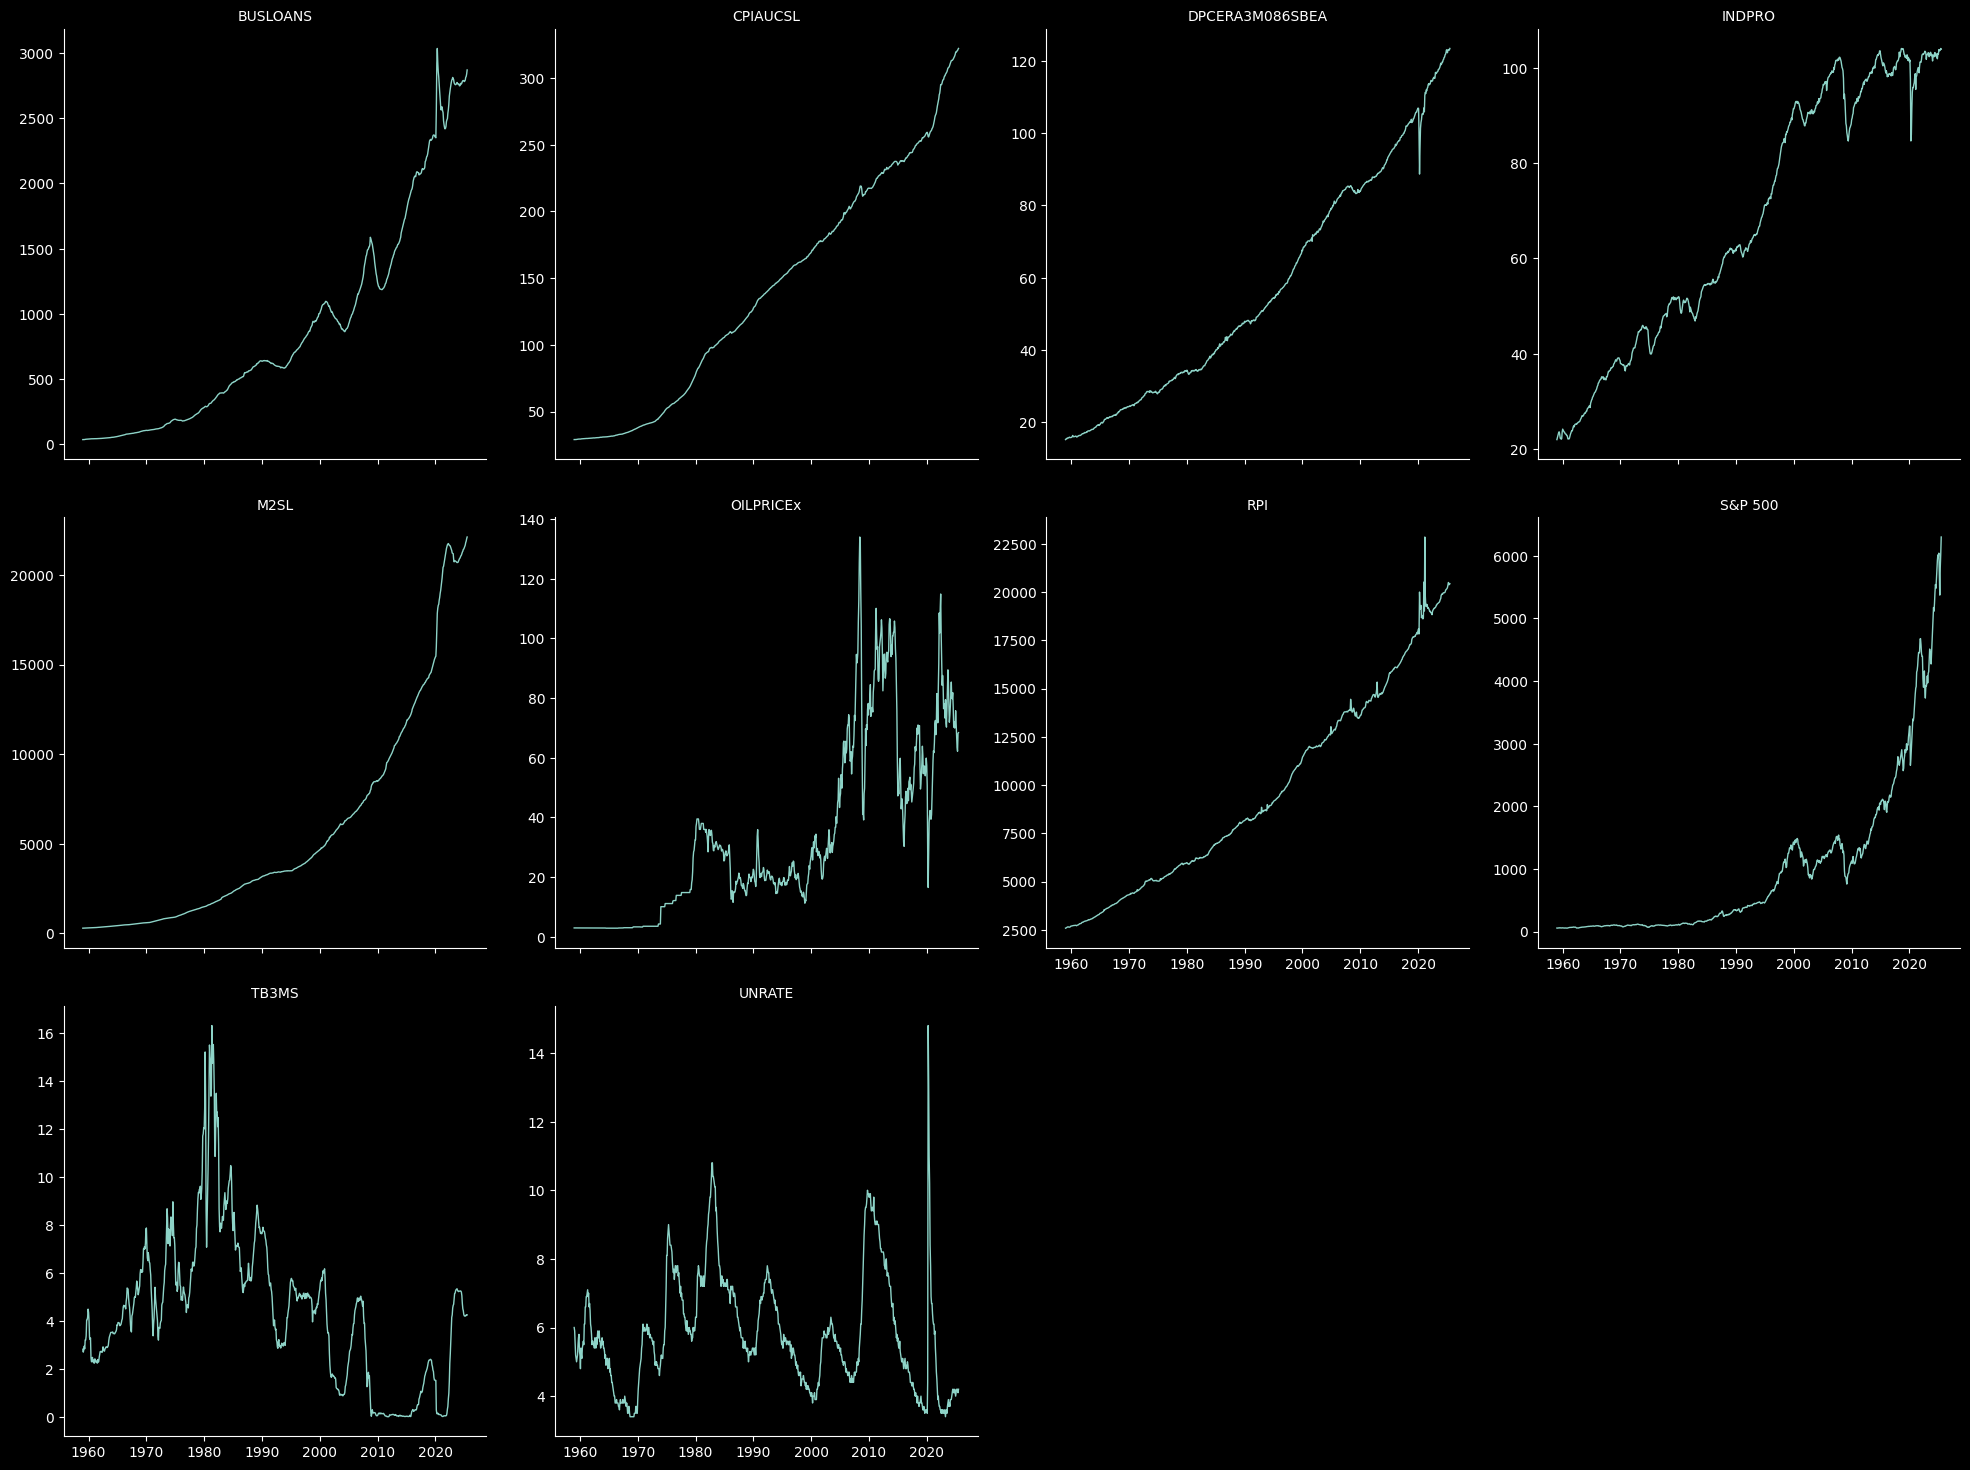

In [15]:
plt.style.use("dark_background")

g = sns.relplot(
    data=df_long,
    x="date", y="value",
    col="series", col_wrap=4,
    kind="line", linewidth=1,
    facet_kws=dict(sharey=False),
    hue=None, legend=False
)

g.set_axis_labels("", "")
g.set_titles("{col_name}")

for ax in g.axes.flat:
    ax.tick_params(axis="x", labelrotation=0, colors="white")
    ax.tick_params(axis="y", colors="white")
    ax.grid(False) 

plt.show()

Vu que le taux de chômage et le monthly treasure bill rate sont en pourcentage, ils sont très proche de l'état stationnaire (moyenne = 0  et variance stable). Le monthly treasure bill est un peu volatile. La variance commence à bouger sur l'OIL price tandis que la tendance à la hausse est la règle pour le reste. En clair, il faut analyser la stationnarité des données.

# 5.Stationnarité et son origine

In [16]:
# === 1) Test ADF (tau3) : racine unitaire ===
def test_adf_trend(series, autolag="AIC"):
    y = pd.Series(series).dropna()
    adf_res = adfuller(y, regression="ct", autolag=autolag)
    return {
        "adf_stat": adf_res[0],
        "adf_pval": adf_res[1],
        "usedlag": adf_res[2]
    }

In [18]:
ALPHA = 0.05
# === Helpers pour choix du lag de diff ===
def diff_l(series, l):
    """Δ_l y_t = y_t - y_{t-l}"""
    s = pd.Series(series)
    return s - s.shift(l)

def adf_ct_pval(x, autolag="AIC"):
    y = pd.Series(x).dropna()
    if len(y) < 20:
        return np.nan, None
    stat, pval, usedlag, *_ = adfuller(y, regression="ct", autolag=autolag)
    return pval, usedlag

def find_opt_diff_lag(series, candidates=(1,3,6,12), alpha=ALPHA, autolag="AIC"):
    details = {}
    best_l, best_p = None, np.inf
    for l in candidates:
        dy = diff_l(series, l)
        pval, usedlag = adf_ct_pval(dy, autolag=autolag)
        details[l] = {"pval": pval, "usedlag": usedlag}
        if pval is not None and not np.isnan(pval):
            if pval < best_p:
                best_p, best_l = pval, l
    passing = [l for l, d in details.items() if d["pval"] is not None and d["pval"] < alpha]
    opt_lag = min(passing) if passing else None
    return opt_lag, details, best_l

In [19]:
# === 2) Modèle 1 : Δy_t = c + β1 t + γ y_{t-1} + ... ===
def estimate_model1(series, lags):
    y = pd.Series(series).dropna()
    dy = y.diff()
    y_lag = y.shift(1)
    trend = np.arange(1, len(y) + 1)

    X = pd.DataFrame({"const": 1.0, "trend": trend, "y_lag": y_lag}, index=y.index)

    # Ajouter les retards de Δy
    for i in range(1, lags + 1):
        X[f"dy_lag{i}"] = dy.shift(i)

    df_model = pd.concat([dy, X], axis=1).dropna()
    dy_aligned = df_model.iloc[:, 0]
    X_aligned = df_model.iloc[:, 1:]
    ols_res = sm.OLS(dy_aligned, X_aligned).fit()
    return ols_res

In [20]:
# === 3) Test de Fisher (φ2) : H0 : c = β1 = γ = 0 ===
def test_fisher_phi2(ols_res):
    f_test = ols_res.f_test("const = 0, trend = 0, y_lag = 0")
    return {"phi2_F": float(f_test.fvalue), "phi2_pval": float(f_test.pvalue)}

In [21]:
# === 4) Analyse d'une série ===
def analyse_series(series, name, alpha=ALPHA):
    adf_out = test_adf_trend(series)
    ols_res = estimate_model1(series, adf_out["usedlag"])

    # Chercher un l optimal pour Δ_l y_t
    opt_lag, opt_scan, best_l = find_opt_diff_lag(series, candidates=(1,3,6,12), alpha=alpha)

    results = {
        "ADF stat (tau3)": adf_out["adf_stat"],
        "ADF p-value": adf_out["adf_pval"],
        "lags used (ADF)": adf_out["usedlag"],
        "beta1": ols_res.params.get("trend", np.nan),
        "beta1 p-value": ols_res.pvalues.get("trend", np.nan),
        "opt_diff_lag": opt_lag,   # lag minimal qui stationnarise Δ_l y_t
        "best_diff_lag": best_l,   # lag avec p-value ADF minimale
        "scan_pvals": {l: d["pval"] for l, d in opt_scan.items()}
    }

    # Décision finale (sur y_t brut)
    if adf_out["adf_pval"] < alpha:
        if results["beta1 p-value"] < alpha:
            results["Conclusion"] = "Stationnaire autour d’une tendance (TS)"
        else:
            results["Conclusion"] = "Stationnaire sans tendance significative"
    else:
        fisher_out = test_fisher_phi2(ols_res)
        results.update(fisher_out)
        if fisher_out["phi2_pval"] < alpha:
            results["Conclusion"] = "Δy_t est TS, donc y_t est I(1)"
        else:
            results["Conclusion"] = "y_t est une marche aléatoire pure (RW)"
    return results

In [27]:
# === 5) Application au DataFrame → tableau large (lignes = variables, colonnes = tests) ===
def analyse_dataframe(df):
    rows = {}
    for col in df.columns:
        rows[col] = analyse_series(df[col], col)
    return pd.DataFrame(rows).T

# --- Exécution ---
summary = analyse_dataframe(df)

# Lags à afficher en colonnes
LAGS_VIEW = [1, 3, 6, 12]

# Construire colonnes Δ_l (p-values + indicateur stationnarité)
scan_cols = {f"ADF p(Δ{l})": [] for l in LAGS_VIEW}
scan_cols.update({f"Stat Δ{l} (p<{ALPHA})": [] for l in LAGS_VIEW})

index_vals = []
for serie, res in summary.iterrows():
    index_vals.append(serie)
    scan = res.get("scan_pvals", {}) or {}
    for l in LAGS_VIEW:
        p = scan.get(l, np.nan)
        scan_cols[f"ADF p(Δ{l})"].append(p)
        if p is None or (isinstance(p, float) and np.isnan(p)):
            scan_cols[f"Stat Δ{l} (p<{ALPHA})"].append(np.nan)
        else:
            scan_cols[f"Stat Δ{l} (p<{ALPHA})"].append(bool(p < ALPHA))

df_scan_wide = pd.DataFrame(scan_cols, index=index_vals)

# Combiner avec le résumé niveau (en retirant la colonne scan_pvals brute)
base_cols = [c for c in summary.columns if c != "scan_pvals"]
df_wide = pd.concat([summary[base_cols], df_scan_wide], axis=1)

# Ordonner les colonnes principales
ordered = [
    "ADF stat (tau3)", "ADF p-value", "beta1", "beta1 p-value",
    "phi2_F", "phi2_pval", "Conclusion",
    "opt_diff_lag", "best_diff_lag",
] + [f"ADF p(Δ{l})" for l in LAGS_VIEW] + [f"Stat Δ{l} (p<{ALPHA})" for l in LAGS_VIEW]
ordered = [c for c in ordered if c in df_wide.columns]

# Affichage propre (toutes colonnes)
with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.width', 200, 'display.max_colwidth', None):
    print(df_wide.reindex(columns=ordered))

                ADF stat (tau3) ADF p-value     beta1 beta1 p-value     phi2_F phi2_pval                                Conclusion opt_diff_lag best_diff_lag     ADF p(Δ1)     ADF p(Δ3)  \
UNRATE                -3.432688    0.047171 -0.000029      0.663838        NaN       NaN  Stationnaire sans tendance significative            1             1  1.370688e-22  1.280713e-06   
TB3MS                 -2.967345    0.141441  -0.00012      0.067359   2.968317   0.03123            Δy_t est TS, donc y_t est I(1)            1            12  2.542756e-07  6.969273e-07   
RPI                   -0.664935    0.975353  0.191166      0.235926  11.687596       0.0            Δy_t est TS, donc y_t est I(1)            1             3  6.504783e-10  1.659480e-10   
INDPRO                -2.322443    0.421578   0.00119      0.031186   4.228771  0.005609            Δy_t est TS, donc y_t est I(1)            1             1  8.786610e-10  1.844838e-08   
DPCERA3M086SBEA       -0.650409    0.976211  0.000701  

## Analyse de la stationnarité : 
On comprend mieux maintenant nos données. Le taux de chômage est stationnaire à niveau. C'est normal puisque c'est un taux. Le reste ne sont pas stationnaires.
Presque toutes les séries sont stationnaires avec une différenciation 1. Seul le prix du baril du pétrol qui est stationnaire autour d'une tendance.

La différenciation d'ordre 1 ne signifie pas que le nombre de lag optimal est égal à 1. Nous pouvons encore appliquer un lag = 1, 3, 6, 12 mais avec une seule différenciation.

# Que faire? 
1. Cible (UNRATE)
- Objectif : prédire la variation annuelle du chômage.
- Transformation : Δ12 UNRATE (même si stationnaire en niveau).
- Justification : cohérent avec l’horizon de prévision (12 mois).

2. Variables explicatives
- TB3MS (taux d’intérêt) : Δ3 niveau.
→ Les taux ne se loggent pas ; variation trimestrielle en points.
RPI, INDPRO, Consommation, BUSLOANS, CPI, M2 : Δ3 log.
→ Taux de croissance trimestriels, stationnarité assurée, moins bruités que Δ1.
S&P 500, Oil : Δ3 log.
→ Séries volatiles, Δ3 lisse le bruit tout en gardant du signal.

3. Pourquoi Δ3 pour les prédicteurs ?
- Stationnarité garantie.
- Compromis bruit / signal : Δ1 trop volatil, Δ12 trop lent.
- Pertinence économique : capte des signaux trimestriels anticipant l’évolution annuelle du chômage.
- et surtout recommandé dans la base FRED-MD (McCracken & Ng, 2016) pour la plupart des séries.

Résumé :
- Target : Δ12 UNRATE.
- Features : Δ3 (niveau pour TB3MS, log-diff pour les autres).

# Stationnariser les taux

In [107]:
# ---------- Transformations ----------
def diff_simple(series, lags=1):
    """Δx_t = x_t - x_{t-l}"""
    return pd.Series(series).diff(lags)

# ---------- Test ADF (constante + tendance) ----------
def adf_test_ct(series, alpha=ALPHA):
    y = pd.Series(series).dropna()
    if len(y) < 20:
        return {"ok": False, "reason": "insufficient_data"}
    stat, pval, usedlag, nobs, crit, icbest = adfuller(y, regression="ct", autolag="AIC")
    return {"ok": True, "stat": stat, "pval": pval, "lags": usedlag, "stationary": (pval < alpha)}

In [108]:
ALPHA = 0.05   # seuil
LAGS_DIFF = 1 

# ---------- 1) Créer le DataFrame des taux transformés ----------
rate_cols = [c for c in ["UNRATE", "TB3MS"] if c in df.columns]
df_rates_trans = pd.DataFrame(index=df.index)

for col in rate_cols:
    df_rates_trans[col] = diff_simple(df[col], lags=LAGS_DIFF)

# Option : aligner sur les observations disponibles
df_rates_trans = df_rates_trans.dropna()

In [109]:
# ---------- 2) Résumé ADF pour les taux transformés ----------
rows = []
for col in df_rates_trans.columns:
    res = adf_test_ct(df_rates_trans[col], alpha=ALPHA)
    if res["ok"]:
        verdict = "Stationary" if res["stationary"] else "Non-stationary"
        rows.append({
            "series": col, "ADF stat": res["stat"], "p-value": res["pval"],
            "lags": res["lags"], "verdict": verdict
        })
    else:
        rows.append({"series": col, "ADF stat": np.nan, "p-value": np.nan,
                     "lags": np.nan, "verdict": res["reason"]})

summary_rates = pd.DataFrame(rows).set_index("series").sort_index()

print("\n=== Nouveau DataFrame des taux (différenciés) ===")
print(df_rates_trans.head())

print("\n=== Résumé ADF sur Δtaux ===")
print(summary_rates)


=== Nouveau DataFrame des taux (différenciés) ===
            UNRATE  TB3MS
date                     
1959-02-01    -0.1  -0.12
1959-03-01    -0.3   0.10
1959-04-01    -0.4   0.15
1959-05-01    -0.1  -0.11
1959-06-01    -0.1   0.37

=== Résumé ADF sur Δtaux ===
         ADF stat       p-value  lags     verdict
series                                           
TB3MS   -6.436463  2.542756e-07    19  Stationary
UNRATE -15.523665  1.370688e-22     3  Stationary


# Stationnariser les autres variables

In [110]:
ALPHA = 0.05
LAGS_DIFF = 1  # 1 = m/m ; mettre 12 pour y/y si besoin

# ---------- Transformations ----------
def diff_simple(series, lags=1):
    return pd.Series(series).diff(lags)

def log_diff(series, lags=1):
    s = pd.Series(series).astype(float)
    s = s.where(s > 0)
    return np.log(s).diff(lags)

def log_diff2(series, lags=1):
    s = pd.Series(series).astype(float)
    s = s.where(s > 0)
    return np.log(s).diff(lags).diff(lags)

# ---------- Test ADF (constante + tendance) ----------
def adf_test_ct(series, alpha=ALPHA):
    y = pd.Series(series).dropna()
    if len(y) < 20:
        return {"ok": False, "reason": "insufficient_data"}
    stat, pval, usedlag, nobs, crit, icbest = adfuller(y, regression="ct", autolag="AIC")
    return {"ok": True, "stat": stat, "pval": pval, "lags": usedlag, "stationary": (pval < alpha)}

# ---------- 1) Taux : Δ (ordre 1) ----------
rate_cols = [c for c in ["UNRATE", "TB3MS"] if c in df.columns]

df_rates_trans = pd.DataFrame(index=df.index)
summary_rates = []

for col in rate_cols:
    y_t = diff_simple(df[col], lags=LAGS_DIFF)     # Δ -> ordre 1
    df_rates_trans[col] = y_t
    res = adf_test_ct(y_t, alpha=ALPHA)
    if res["ok"]:
        summary_rates.append({
            "series": col, "method": "Δ", "order": 1,
            "ADF stat": res["stat"], "p-value": res["pval"], "lags": res["lags"],
            "verdict": "Stationary" if res["stationary"] else "Non-stationary"
        })
    else:
        summary_rates.append({"series": col, "method": "Δ", "order": 1,
                              "ADF stat": np.nan, "p-value": np.nan, "lags": np.nan,
                              "verdict": res["reason"]})

df_rates_trans = df_rates_trans.dropna()
summary_rates = pd.DataFrame(summary_rates).set_index("series").sort_index()

# ---------- 2) Niveaux positifs : Δlog (ordre 1) puis Δ²log (ordre 2 si besoin) ----------
log1_cols = ["RPI", "INDPRO", "DPCERA3M086SBEA", "S&P 500", "BUSLOANS", "CPIAUCSL", "OILPRICEx", "M2SL"]
log1_cols = [c for c in log1_cols if c in df.columns]

df_log_trans = pd.DataFrame(index=df.index)
summary_log = []

for col in log1_cols:
    # Essai Δlog (ordre 1)
    y1 = log_diff(df[col], lags=LAGS_DIFF)
    r1 = adf_test_ct(y1, alpha=ALPHA)

    if r1["ok"] and r1["stationary"]:
        df_log_trans[col] = y1
        summary_log.append({
            "series": col, "method": "Δlog", "order": 1,
            "ADF stat": r1["stat"], "p-value": r1["pval"], "lags": r1["lags"],
            "verdict": "Stationary"
        })
        continue

    # Sinon, essai Δ²log (ordre 2)
    y2 = log_diff2(df[col], lags=LAGS_DIFF)
    r2 = adf_test_ct(y2, alpha=ALPHA)

    df_log_trans[col] = y2  # on garde le plus fort niveau de diff tenté
    if r2["ok"]:
        summary_log.append({
            "series": col, "method": "Δ²log", "order": 2,
            "ADF stat": r2["stat"], "p-value": r2["pval"], "lags": r2["lags"],
            "verdict": "Stationary" if r2["stationary"] else "Non-stationary"
        })
    else:
        summary_log.append({
            "series": col, "method": "Δ²log", "order": 2,
            "ADF stat": np.nan, "p-value": np.nan, "lags": np.nan,
            "verdict": r2["reason"]
        })

df_log_trans = df_log_trans.dropna()
summary_log = pd.DataFrame(summary_log).set_index("series").sort_index()

In [111]:
# ---------- 3) Fusion : DataFrame global stationnaire + résumé ----------
df_stationary = pd.concat([df_rates_trans, df_log_trans], axis=1)
summary_all = pd.concat([summary_rates, summary_log]).sort_index()

In [112]:
summary_all

,method,order,ADF stat,p-value,lags,verdict
series,,,,,,
BUSLOANS,Δlog,1,-8.192679,2.562711e-11,4,Stationary
CPIAUCSL,Δ²log,2,-11.578271,1.963857e-18,13,Stationary
DPCERA3M086SBEA,Δlog,1,-15.522596,1.371625e-22,4,Stationary
INDPRO,Δlog,1,-7.548286,7.890372e-10,10,Stationary
M2SL,Δlog,1,-5.643157,1.193468e-05,8,Stationary
OILPRICEx,Δlog,1,-15.090976,1.978127e-22,3,Stationary
RPI,Δlog,1,-7.084971,9.068496e-09,19,Stationary
S&P 500,Δlog,1,-11.187454,9.903767e-18,5,Stationary
TB3MS,Δ,1,-6.436463,2.542756e-07,19,Stationary


# Présenter graphiquement les séries temporelles stationnaires

In [114]:
# 1) s'assurer que l'index est bien nommé/typé
df_stationary = df_stationary.copy()
df_stationary.index.name = "date"
df_stationary.index = pd.to_datetime(df_stationary.index)

# 2) passage en format long
df_long = (
    df_stationary
      .reset_index()                           # sasdate -> colonne
      .melt(id_vars="date",
            var_name="series",
            value_name="value")
      .dropna(subset=["value"])
      .sort_values(["series", "date"])
      .reset_index(drop=True)
)

# 3) ajouter method/order si tu as déjà 'summary_all'
if "summary_all" in globals():
    meta = summary_all[["method", "order"]].reset_index()  # 'series' en index dans summary_all
    df_long = df_long.merge(meta, on="series", how="left")

print(df_long.head())

        date    series     value method  order
0 1959-03-01  BUSLOANS -0.002550   Δlog      1
1 1959-04-01  BUSLOANS  0.012101   Δlog      1
2 1959-05-01  BUSLOANS  0.020826   Δlog      1
3 1959-06-01  BUSLOANS  0.022711   Δlog      1
4 1959-07-01  BUSLOANS  0.014013   Δlog      1


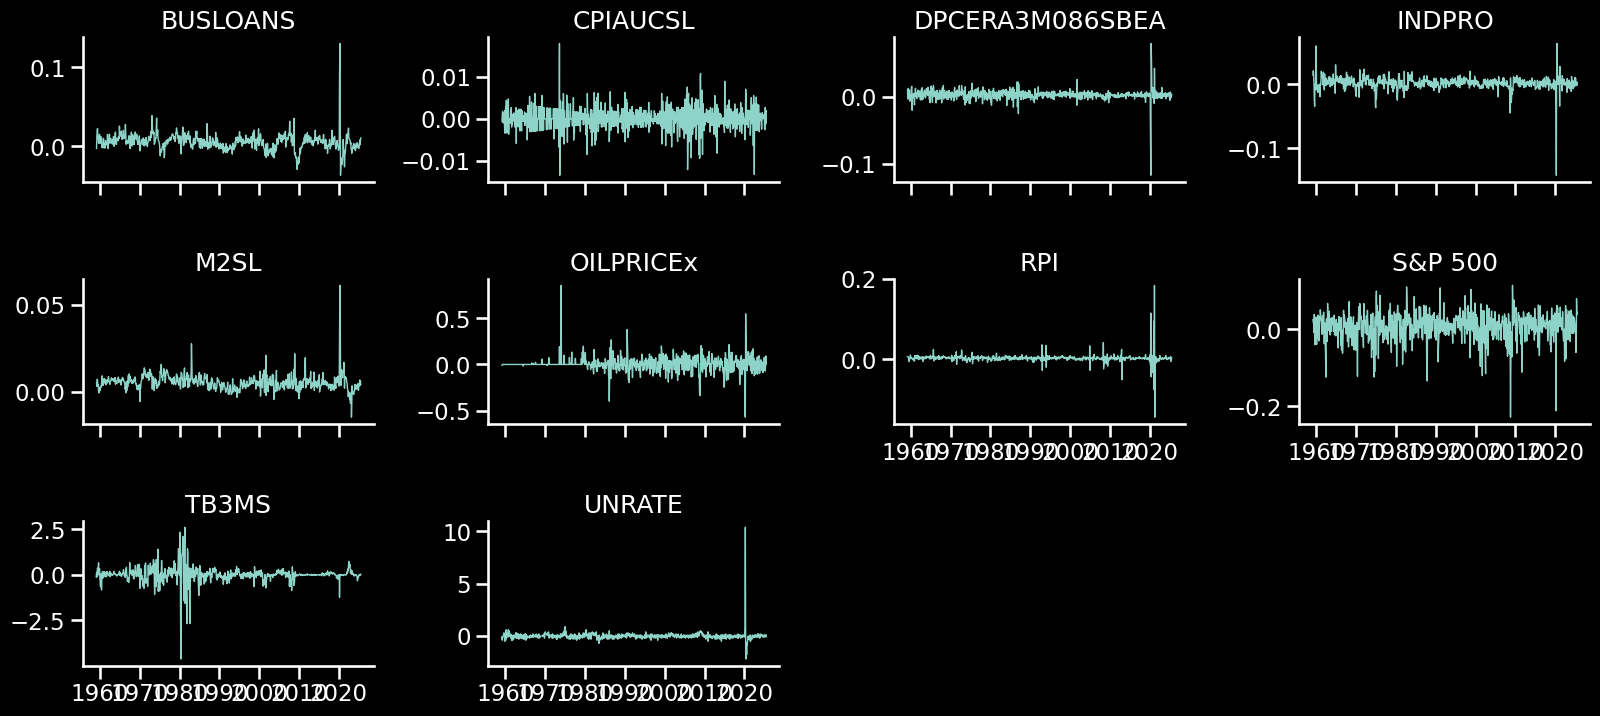

In [115]:
# s'assurer de l'ordre et du type de date
df_long = df_long.sort_values(["series", "date"]).copy()
df_long["date"] = pd.to_datetime(df_long["date"])

plt.style.use("dark_background")
sns.set_context("talk")

g = sns.relplot(
    data=df_long,
    x="date", y="value",
    col="series", col_wrap=4,
    kind="line", linewidth=1,
    facet_kws=dict(sharey=False),
    hue=None, legend=False,
    height=2.6, aspect=1.6
)

g.set_axis_labels("", "")
g.set_titles("{col_name}")

# Formatage des dates pour plus de lisibilité en fond sombre
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)

for ax in g.axes.flat:
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter)
    ax.tick_params(axis="x", labelrotation=0, colors="white")
    ax.tick_params(axis="y", colors="white")
    ax.grid(False)

plt.show()

# Exporter la série stationnaire

In [116]:
df_stationary.to_csv("df_stationary.csv")